In [273]:
from sympy import *
import math
import cmath
import matplotlib.pyplot as plt
s = sympy.Symbol("s")
w = sympy.Symbol("w")

# Parametry wejściowe transformatora: #

In [274]:
Sn = 315 # kVA
uz = 0.045 # %
PFe = 944 # W
PCu = 5.195 # kW
UH = 10000 # V
UL = 400 # V
UHa = UH/(3**0.5) # V
ULa = UL / (3**0.5) #V
I1n = 18.2 # A
Io = 0.02*I1n # A
f = 50 # Hz
a = UH/UL # przekładnia



# Parametry obliczone transformatora: #

In [275]:
# STAN JAŁOWY: 
RFe = UHa**2 / PFe # Ω
IFe = UHa / RFe # A 
Iu = (Io**2 - IFe**2)**0.5 # A
Xu = UHa/Iu # Ω
Lu = Xu / (2*math.pi*f)

# STAN ZWARCIA
R1 = (PCu/(3*(I1n**2)))* 0.5 # Ω
R2p = R1 # Ω
R2 = R2p/a**2
Zz = UHa*uz/I1n # Ω
X1 = 0.5*(Zz**2 - (R1 + R2p))**0.5 # Ω
X2p = X1 # Ω
L1 = X2p/(2*math.pi*f) # H
L2p = L1 # H

X2 = X2p/a**2 # H


# Odbiornik: # 

In [276]:
cos_fi = 1 # - 
Pobc = 50000 # W
Robc_p = ULa**2*cos_fi/Pobc # Ω


In [277]:
#Wszystkie parametry:
params = {
    "Sn":Sn, "uz":uz,"PFe":PFe, "PCu":PCu, "UH":UH,"UL":UL, "UHa":UHa, "ULa":ULa, "I1n":I1n, "Io":Io, "f":f, "a":a, "RFe":RFe,
    "IFe":IFe,"Iu":Iu,"Xu":Xu,"Lu":Lu,"R1":R1,"R2p":R2p,"R2":R2,"Zz":Zz,"X1":X1,"X2p":X2p,"L1":L1,"L2p":L2p,"X2":X2, "cos_fi":cos_fi,
    "Pobc":Pobc,"Robc_p":Robc_p
}

for parametr in params.items():
    print(f"{parametr[0]} = {parametr[1]}")

Sn = 315
uz = 0.045
PFe = 944
PCu = 5.195
UH = 10000
UL = 400
UHa = 5773.502691896258
ULa = 230.94010767585033
I1n = 18.2
Io = 0.364
f = 50
a = 25.0
RFe = 35310.734463276836
IFe = 0.163505596234502
Iu = 0.32521057793374436
Xu = 17753.120850430954
Lu = 56.50993877307758
R1 = 0.002613915388640664
R2p = 0.002613915388640664
R2 = 4.182264621825063e-06
Zz = 14.275144018424815
X1 = 7.137480453843508
X2p = 7.137480453843508
L1 = 0.022719305909019574
L2p = 0.022719305909019574
X2 = 0.011419968726149612
cos_fi = 1
Pobc = 50000
Robc_p = 1.0666666666666669


# Wyznaczenie transmitancji układu z odbiornikiem: # 

In [278]:
# Impedancja zastępcza gałęzi poprzecznej:
Zo_s = (RFe*s*Lu)/(RFe+s*Lu)
print(Zo_s)

1995407.44255217*s/(56.5099387730776*s + 35310.7344632768)


In [279]:
# Impedancja transformatora - gałąź poprzeczna + strona wtórna
Z2_s = (Zo_s*(R2p+s*L2p+Robc_p))/(Zo_s+R2p+s*L2p+Robc_p)
print(Z2_s)

1995407.44255217*s*(0.0227193059090196*s + 1.06928058205531)/((56.5099387730776*s + 35310.7344632768)*(0.0227193059090196*s + 1995407.44255217*s/(56.5099387730776*s + 35310.7344632768) + 1.06928058205531))


In [280]:
# Impedancja zastępcza transformatora:
Z_s = R1 + s*L1 + Z2_s
print(Z_s)

1995407.44255217*s*(0.0227193059090196*s + 1.06928058205531)/((56.5099387730776*s + 35310.7344632768)*(0.0227193059090196*s + 1995407.44255217*s/(56.5099387730776*s + 35310.7344632768) + 1.06928058205531)) + 0.0227193059090196*s + 0.00261391538864066


In [281]:
# Transmitancja układu: 
H_s = Robc_p/(Z_s + Robc_p)
print(H_s)

1.06666666666667/(1995407.44255217*s*(0.0227193059090196*s + 1.06928058205531)/((56.5099387730776*s + 35310.7344632768)*(0.0227193059090196*s + 1995407.44255217*s/(56.5099387730776*s + 35310.7344632768) + 1.06928058205531)) + 0.0227193059090196*s + 1.06928058205531)


# Transmitancja układu: #

In [282]:
H_ss = simplify(H_s)

In [313]:
print(f"H(s) = {H_ss}")

H(s) = 1.0*(1.36945769161122*s**2 + 2129354.77643791*s + 40274.2215463393)/(0.0291685577111016*s**3 + 90689.5160591421*s**2 + 4269081.10390156*s + 40372.9153658382)


In [308]:
num_H, den_H = fraction(H_ss)
print(num_H)
print(den_H)

1.36945769161122*s**2 + 2129354.77643791*s + 40274.2215463393
0.0291685577111016*s**3 + 90689.5160591421*s**2 + 4269081.10390156*s + 40372.9153658382


# Zera i bieguny: #

In [311]:
zeros = solve(num_H)
poles = solve(den_H)
print(zeros)
print(poles)

[-1554889.03642651, -0.0189138148710058]
[-3109106.17754377 + 0.e-21*I, -47.0648437208992 + 0.e-20*I, -0.00945895112632052 + 0.e-22*I]


# Wyznaczenie charakterystyk: #

In [289]:
w_range = list(range(0,1000))

In [290]:
y_range = list(range(0,1000))

In [291]:
for x in w_range:
    y_range[x] = H_ss.subs(s, 1j*w_range[x])
print(y_range)

[0.997555444817284, 5.48619030406639e-14*(-50316.6006933039 - 4269081.074733*I)*(40272.8520886477 + 2129354.77643791*I), 1.36978529083837e-14*(-322385.14887073 - 8538161.97445466*I)*(40268.7437155728 + 4258709.55287582*I), 6.07432381666579e-15*(-775832.72916644 - 12807242.5241536*I)*(40261.8964271148 + 6388064.32931373*I), 3.4061018429732e-15*(-1410659.34158043 - 17076322.5488185*I)*(40252.3102232735 + 8517419.10575164*I), 2.17115139174742e-15*(-2226864.98611271 - 21345401.8734381*I)*(40239.985104049 + 10646773.8821896*I), 1.50037807011587e-15*(-3224449.66276328 - 25614480.3230009*I)*(40224.9210694413 + 12776128.6586275*I), 1.09599001516287e-15*(-4403413.37153212 - 29883557.7224956*I)*(40207.1181194503 + 14905483.4350654*I), 8.33595021998657e-16*(-5763756.11241925 - 34152633.8969109*I)*(40186.5762540761 + 17034838.2115033*I), 6.53766671560104e-16*(-7305477.88542467 - 38421708.6712355*I)*(40163.2954733188 + 19164192.9879412*I), 5.25205094065962e-16*(-9028578.69054837 - 42690781.8704579*

In [293]:
mods = list(range(0,1000))
for x in w_range:
    mods[x] = abs(y_range[x])


In [295]:
args = list(range(0,1000))
for x in w_range:
    args[x] = (arg(y_range[x]))*(180/math.pi)

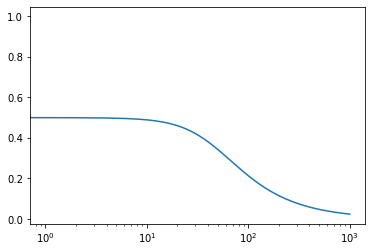

In [314]:
plt.plot(w_range,mods)
plt.xscale("log")

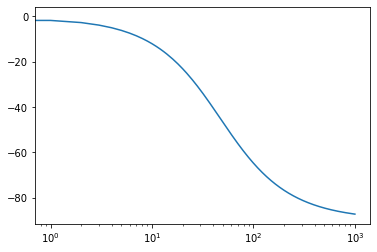

In [315]:
plt.plot(w_range,args)
plt.xscale("log")